Jupyter Notebook of the Iris Flower Dataset
<br>Notebook is by Solomon Sonya 0xSolomonSonya
<br>Some code and data cells in this notebook may have been augmented from ChatGPT, Copilot, Gemini, other Generative AI models, and online resources.

# This notebook provides a methodology to complete dimensionality reduction (e.g., PCA) and unsupervised learning (e.g., clustering with KMeans) to understand associations of instances within the iris dataset

# imports

In [1]:
from sklearn.datasets import load_iris
from sklearn import datasets

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stat
import scipy.stats as st
import scipy as sp
import os
#import scikitplot as skplt
import datetime
from tabulate import tabulate

import sklearn
import plotly.graph_objs as go
import ipywidgets as widgets
import math
import statsmodels
import warnings
import io
import inspect
import sys
import traceback

from scipy.stats.mstats import winsorize
from IPython.display import display, HTML
from sklearn.preprocessing import RobustScaler

#scale the data via z-score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

#preprocesing
#learning and prediction algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier, Perceptron
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.calibration import CalibratedClassifierCV
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import Lasso, LassoCV, RidgeCV, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder  # Optional for categorical labels
from sklearn.metrics import classification_report
from sklearn.inspection import permutation_importance
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.linear_model import RidgeClassifier

# models
from sklearn import ensemble
from sklearn import linear_model
from sklearn import naive_bayes
from sklearn import tree
from sklearn import gaussian_process
from sklearn import neighbors
from sklearn import svm
from xgboost import XGBRegressor
from sklearn import discriminant_analysis
from sklearn import neural_network
from sklearn import calibration

#from lightgbm import LGBMClassifier
#from catboost import CatBoostClassifier


# save and import trained models
import pickle

# Deep Learning
#import tensorflow as tf
#from tensorflow import keras
#from sklearn.datasets import make_classification

# PCA
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

#importing  [Bagging]
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor

#importing  [Boosting]
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
import xgboost
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis

# model tuning
from sklearn.model_selection import GridSearchCV

# evaluation metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, r2_score
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import make_scorer,mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_absolute_percentage_error, rand_score
from sklearn.metrics import jaccard_score, dcg_score, consensus_score, d2_absolute_error_score
from sklearn.metrics import d2_pinball_score, d2_tweedie_score, davies_bouldin_score
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import auc, precision_recall_curve
from sklearn.metrics import cohen_kappa_score
from kneed import KneeLocator
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score



import numpy as np 
from sklearn.linear_model import Perceptron
from sklearn.model_selection import KFold




#update system
#!pip install --upgrade scikit-learn
#!pip install xgboost
#model tuning

%matplotlib inline
#to ignore warnings
warnings.filterwarnings("ignore")
print("imports complete.")



imports complete.


In [2]:
#pip install kneed

<hr style="height:75px;color:red;background-color:red;">

# <b><u>Helper Functions</b></u>

# pprint df

In [3]:
# this can be a very useful function to print contents of dataframe when the default printing scheme doesn't display the df in an easy to read manner
def print_df(dataframe):
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):
        print(tabulate(dataframe, headers='keys', tablefmt='pretty'))

#print_df(df_iris.describe().T)

## Display Confusion Matrix

In [4]:
def display_confusion_matrix(model_NAME, conf_mtx, lst_class_labels):
    os.makedirs('./confusion_matrix', exist_ok=True)        
            
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_mtx, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=lst_unique_class_names, yticklabels=lst_unique_class_names)
    plt.title(model_NAME + ' Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
        
    # Save the figure
    plt.savefig('confusion_matrix/confusion_matrix_' + str(model_NAME) + '.png', dpi=300, bbox_inches='tight')
    
    # Show the plot
    plt.show()

## Model Learning Curve

In [5]:
def model_learning_curve(model_name, X, y, num_trials, test_size_override, alpha, show_learning_curve):
    # set lerning curves to compute at varying amounts of training data
    #lst_training_size = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80]
    lst_training_proportion = [0.05, 0.10, 0.20, 0.40, 0.60, 0.80]

    # notify
    print(f'commencing evaluation of model [{model_name}]')
    
    # set test size
    testSize = test_size_override

    if testSize < .05 or testSize > .99:
        testSize = 0.1
    
    # set num trials
    numTrials = num_trials

    if numTrials < 1:
        numTrials = 1
    
    # create list to store eval scores ffor training and test sets
    lst_eval_scores_TRAINING_SET = []
    lst_std_dev_TRAINING_SET = []
    lst_std_err_TRAINING_SET = []
    
    
    lst_eval_scores_TEST_SET = []
    lst_std_dev_TEST_SET = []
    lst_std_err_TEST_SET = []
    

    continue_modeling = True

        
    # outter loop: training size
    for i in range(len(lst_training_proportion)):
        # set training size percentage   
        trainSize = lst_training_proportion[i]
        
        # init eval scores at this percentage (index)
        total_eval_score_TRAINING = 0
        total_eval_score_TEST = 0

        lst_training_scores_for_this_proportion = []
        lst_test_scores_for_this_proportion = []

        if not continue_modeling:
            break
    
        # iterate num trails, store average eval score
        for j in range(numTrials):
            
            # establish training/testing hold-out
            X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=testSize,train_size=trainSize,shuffle=True) 
    
            # initialize model
            
            ################################################################################
            # General Linear Models
            ################################################################################
            if model_name == 'logistic_regression':
                mdl = LogisticRegression() # use default parameters            
            elif model_name == 'perceptron':
                mdl = linear_model.Perceptron()
            elif model_name == 'sgd_classifier':
                mdl = SGDClassifier()
            elif model_name == 'passive_aggressive':
                mdl = linear_model.PassiveAggressiveClassifier()
            elif model_name == 'ridge_classifier':
                mdl = RidgeClassifier()

            ################################################################################
            # SVM
            ################################################################################
            elif model_name == 'linear_svc':
                mdl = svm.LinearSVC()
            elif model_name == 'svc':
                mdl = svm.SVC(probability=True, kernel='linear')
            #elif model_name == 'svc_nu':
            #    mdl = svm.NuSVC(probability=True, kernel='linear')

            # tree
            elif model_name == 'decision_tree':
                mdl = DecisionTreeClassifier()

            ################################################################################
            # ensemble
            ################################################################################
            elif model_name == 'random_forest':
                mdl = RandomForestClassifier() # random_state=42
            elif model_name == 'extra_tree':
                mdl = ExtraTreesClassifier()
            elif model_name == 'bagging_classifier':
                mdl = BaggingClassifier()
            elif model_name == 'gradient_boosting':
                mdl = ensemble.GradientBoostingClassifier() # random_state=42
            elif model_name == 'ada_boosting':
                mdl = ensemble.AdaBoostClassifier()
            elif model_name == 'hist_boosting':
                mdl = HistGradientBoostingClassifier()

            ################################################################################
            # Gaussian Processes
            ################################################################################
            elif model_name == 'gaussian_process':
                mdl = gaussian_process.GaussianProcessClassifier()

            ################################################################################
            # NBC probabilistic
            ################################################################################
            elif model_name == 'nbc_gaussian':
                mdl = GaussianNB()
            elif model_name == 'nbc_bernoulli':
                mdl = naive_bayes.BernoulliNB()

            ################################################################################
            # neighbors
            ################################################################################
            elif model_name == 'knn':
                mdl = KNeighborsClassifier()

            ################################################################################
            # discriminant analysis
            ################################################################################
            #elif model_name == 'quadratic_discriminant':
            #    mdl = QuadraticDiscriminantAnalysis()
            elif model_name == 'linear_discriminant':
                mdl = LinearDiscriminantAnalysis()

            ################################################################################
            # neural network
            ################################################################################
            elif model_name == 'mlp':
                mdl = MLPClassifier(hidden_layer_sizes=(100), max_iter=500)  

            ################################################################################
            # ELSE
            ################################################################################
            else:
                print(f'\n\n ERROR! I am not configured to test model {model_name}\n\n')
                continue_modeling = False
                break
    
                                    
            
            # validate modeling
            if not continue_modeling:
                continue
            
            ################################################################################
            # train the model to learn the training set
            ################################################################################
            mdl.fit(X_train, y_train) 
    
            # use score helper function to apply trained model to the test set and return accuracy. then accumulate model eval performance
            eval_score_TEST = mdl.score(X_test,y_test)

            # store specific score
            lst_test_scores_for_this_proportion.append(eval_score_TEST)

            # accumulate total for the mean
            total_eval_score_TEST = total_eval_score_TEST + eval_score_TEST
            
            eval_score_TRAINING = mdl.score(X_train,y_train)

            # store specific score for this num trial
            lst_training_scores_for_this_proportion.append(eval_score_TRAINING)

            # accumulate total for the mean
            total_eval_score_TRAINING = total_eval_score_TRAINING + eval_score_TRAINING

        #############################################################################################
        # done with num trials (inner loop) at this training size, store average evaluation score
        ############################################################################################
        if continue_modeling:
            lst_eval_scores_TEST_SET.append(total_eval_score_TEST/numTrials)
            lst_eval_scores_TRAINING_SET.append(total_eval_score_TRAINING/numTrials)

            # calculate std dev
            std_dev_training = np.std(lst_training_scores_for_this_proportion, ddof=1)
            std_dev_test = np.std(lst_test_scores_for_this_proportion, ddof=1)
            
            # store std dev
            lst_std_dev_TRAINING_SET.append(std_dev_training)
            lst_std_dev_TEST_SET.append(std_dev_test)

            # std err
            lst_std_err_TRAINING_SET.append(std_dev_training / np.sqrt(len(lst_std_dev_TRAINING_SET))) # len(lst_std_dev_TRAINING_SET) should == numtrials
            lst_std_err_TEST_SET.append(std_dev_test / np.sqrt(len(lst_std_dev_TEST_SET))) # len(lst_std_dev_TEST_SET) should == numtrials
                                            

            

    ###############################################################################################
    # done with outter loop
    ###############################################################################################
    if continue_modeling:
               

        # calculate score ratio as a way of quantitatively determine overfitting 
        lst_score_ratio = np.array(lst_eval_scores_TRAINING_SET) / np.array(lst_eval_scores_TEST_SET)
        lst_score_ratio

        # we use paired t-test becauses the underlying data is similar
        t_statistic, p_value = st.ttest_rel(lst_eval_scores_TRAINING_SET, lst_eval_scores_TEST_SET)

        disposition = 'fail to reject null hypothesis; observed difference between 2 samples are not statistically significant'
        if p_value < alpha:
            disposition = ' reject null hypothesis; observed difference between 2 samples are statistically significant'


        # plot learning curves
        if show_learning_curve:
            plt.figure(figsize=(10, 6))
            plt.plot(lst_training_proportion,lst_eval_scores_TEST_SET, label='Test Set', marker='o')
            plt.plot(lst_training_proportion,lst_eval_scores_TRAINING_SET, label='Training Set', marker='x')
            plt.xlabel('Training Size')
            plt.ylabel('Evaluation Score')
            plt.title('Learning Curve for model ' + str(model_name))
            plt.legend()
            plt.grid(True)
            plt.show();

        # notify
        print(f"\nTraining complete for model {model_name}!")
        try:
            # Format values to 4 decimal places
            # Round values to 4 decimal places
            rounded_training_set = [round(score, 4) for score in lst_eval_scores_TRAINING_SET]
            rounded_test_set = [round(score, 4) for score in lst_eval_scores_TEST_SET]

            rounded_std_dev_train_set = [round(score, 4) for score in lst_std_dev_TRAINING_SET]
            rounded_std_err_train_set = [round(score, 4) for score in lst_std_err_TRAINING_SET]
            
            rounded_std_dev_test_set = [round(score, 4) for score in lst_std_dev_TEST_SET]
            rounded_std_err_test_set = [round(score, 4) for score in lst_std_err_TEST_SET]
            
            rounded_score_ratio = [round(score, 4) for score in lst_score_ratio]
            rounded_p_value = round(p_value, 4)
            
            # Print rounded lists
            print("Training set:", rounded_training_set)
            print("Test set:    ", rounded_test_set)
            print('------------------------------------')
            print("Train stddev:", rounded_std_dev_train_set)
            print("Train stderr:", rounded_std_err_train_set)                       
            print("Test stddev:", rounded_std_dev_test_set)
            print("Test stderr:", rounded_std_err_test_set)            
            print('------------------------------------')
            print("Score Ratio: ", rounded_score_ratio)
            print("Trn/Tst p-value:", rounded_p_value)
            print('p-value disposition:', disposition)
            print('=========================================================================================================================================\n')
        except:        
            print("Training set:", lst_eval_scores_TRAINING_SET)
            print("Test set:    ", lst_eval_scores_TEST_SET)
            print('------------------------------------')
            print("Train stddev:", lst_std_dev_TRAINING_SET)
            print("Train stderr:", lst_std_err_TRAINING_SET)                        
            print("Test stddev:", lst_std_dev_TEST_SET)
            print("Test stderr:", lst_std_err_TEST_SET)            
            print('------------------------------------')
            print("Score Ratio: ", lst_score_ratio)
            print("Trn/Tst p-value:", p_value)
            print('p-value disposition:', disposition)
            print('=========================================================================================================================================\n')
        
        

        return lst_training_proportion, lst_eval_scores_TRAINING_SET, lst_std_dev_TRAINING_SET, lst_std_err_TRAINING_SET, lst_eval_scores_TEST_SET, lst_std_dev_TEST_SET, lst_std_err_TEST_SET, lst_score_ratio, p_value, disposition

#lst_training_proportion, lst_eval_scores_TRAINING_SET, lst_std_dev_TRAINING_SET, lst_std_err_TRAINING_SET, lst_eval_scores_TEST_SET, lst_std_dev_TEST_SET, lst_std_err_TEST_SET, lst_score_ratio, p_value, disposition = model_learning_curve('logistic_regression', X, y, 5, 0.1, 0.05, True)

# Get Time

In [6]:
def get_time():
    formatted_time = ""

    try:
        now = datetime.datetime.now()

        year = now.year
        month = now.month
        day = now.day
        hour = now.hour
        min = now.minute

        formatted_time = "{}-{:02}-{:02}-{:02}{:02}".format(year, month, day, hour, min)

    except Exception as error:
        print_exception(error, inspect.currentframe().f_code.co_name, False)

    return formatted_time

# Calculate Time Duration

In [7]:
def calculate_time_duration(datetime_duration):
    formatted_time = ""

    try:
        days = datetime_duration.days
        hours = datetime_duration.seconds // 3600
        minutes = (datetime_duration.seconds % 3600) // 60
        # seconds = str(divmod(datetime_duration.seconds, 1))
        seconds = datetime_duration.seconds % 60

        formatted_time = f"{days} day(s), {hours} hour(s), {minutes} minute(s), {seconds} second(s)"

    except Exception as error:
        print_exception(error, inspect.currentframe().f_code.co_name, False)

    return formatted_time

# Display Sum NaN Function

In [8]:
def display_NaN_columns(dataframe):
    try:
        
        lst_nan_sum = dataframe.isna().sum()

        filtered_cols_with_na_sum_greater_than_zero = lst_nan_sum[lst_nan_sum > 0]

        if len(filtered_cols_with_na_sum_greater_than_zero) < 1:
            print("NO COLS WITH NaN!!!!!!!!!!!!")
        else:
            print(f'Columns with NaN: {len(filtered_cols_with_na_sum_greater_than_zero)}')
            print(filtered_cols_with_na_sum_greater_than_zero)
        
        
    except Exception as error:
        print_exception(error, inspect.currentframe().f_code.co_name, False) 

# Check Unique Cols

In [9]:
def print_nunique(SERIES, num_columns):
    # iterate through df
    if num_columns < 1:
        num_columns = 1
    try:
        count = 0
        for col, vol in SERIES.items():
            print(f'{col}:  {vol}', end='\t\t\t\t')
            count += 1
            
            if count % num_columns == 0:
                print('')
            
    except Exception as error:
        print_exception(error, inspect.currentframe().f_code.co_name, False)

# Feature Importance

In [10]:
# this is a helper function for 
lst_coef_models = ['logistic_regression', 'perceptron', 'sgd_classifier', 'passive_aggressive', 'ridge_classifier', 'linear_svc', 'svc', 'svc_nu']
lst_all_feature_importance = ['bagging_classifier']
lst_permutation_importance = ['nbc_gaussian', 'knn' , 'ada_boosting', 'quadratic_discriminant', 'linear_discriminant', 'hist_boosting', 'gaussian_process', 'mlp', 'nbc_bernoulli']

def display_feature_importance_chart(model, model_name, lst_feature_names, num_coefficients_to_display, figure_save_name_ok_to_be_null):

    # not all functions have the same protocol to extract feature importance coefficients
    if model_name in lst_coef_models:
        ftr_importance = np.abs(model.coef_[0])
        
    elif model_name in lst_all_feature_importance:
        all_feature_importances = np.array([tree.feature_importances_ for tree in model.estimators_])
    
        # Average the feature importances across all trees
        mean_feature_importances = np.mean(all_feature_importances, axis=0)
    
        ftr_importance = mean_feature_importances
    
    elif model_name in lst_permutation_importance:
        results = permutation_importance(model, X_test, y_test, scoring='accuracy', n_repeats=10, random_state=42)
    
        # Get feature importances
        importance = results.importances_mean
        ftr_importance = np.abs(importance)    
        
    #elif model_name in lst_log_prob:
    #    ftr_importance = model.feature_log_prob_
    
    else:
        ftr_importance = model.feature_importances_


    return display_feature_importance(model_name, lst_feature_names, ftr_importance, num_coefficients_to_display, figure_save_name_ok_to_be_null)
    

In [11]:
#display feature importance
def display_feature_importance(model_name, list_col_names, feature_importances, num_features, figure_save_name_ok_to_be_null):
    try:
        # make directory
        os.makedirs('./feature_importance', exist_ok=True)
        os.makedirs('./feature_importance_data', exist_ok=True)

        
        #plot importances
        feature_names = list_col_names
        importances = feature_importances
        indices = np.argsort(importances)

        # save coefficients to file
        # reverse indices
        reverse_indices = indices[::-1]
        try:
            if figure_save_name_ok_to_be_null is not None and len(figure_save_name_ok_to_be_null) > 0:
                # Export to a file
                with open(str('./feature_importance_data/' + figure_save_name_ok_to_be_null) + '.csv', 'w') as file:
                    # write header
                    file.write(str(model_name) + '_feature,importance_coefficient\n')
                    
                    # write values
                    for i in reverse_indices:
                        file.write(str(list_col_names[i]) + "," + str(importances[i]) + '\n')
        except:
            pass
        

        # reduce the number of values to print to cell
        if num_features > 0:
            indices = np.argsort(importances)[-num_features:]

        
        figure_height = math.ceil(num_features / 2)
        
        if figure_height < 1:
            figure_height = math.ceil(len(feature_importances) / 3)
        
        plt.figure(figsize=(15, figure_height))
        plt.title("Feature Importances for model [" + str(model_name) + "]")
        plt.barh(range(len(indices)), importances[indices], align="center", edgecolor='black')
        plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
        plt.xlabel("Relative Importance")

        # ensure all text fits within figure
        plt.tight_layout()
        
        try:
          if figure_save_name_ok_to_be_null is not None and len(figure_save_name_ok_to_be_null) > 0:
              # Save the figure
              plt.savefig('./feature_importance/' + str(figure_save_name_ok_to_be_null) + '.png', bbox_inches='tight')    # add 'tight' to ensure all text fits inside the figure
        except:
            pass
            
        #plt.show()
        
                
            
        
        #display list of coefficients
        print("coefficients:\n====================")
        #count = 0
        #for i,v in enumerate(importances):
        #    print('%s:\t %.5f' % (list_col_names[i],v))
        #    count += 1
        #    if num_features > 0 and count > num_features:
        #        break

        # resort and take limit number of expected output features
        if num_features > 0:
            reverse_indices = indices[::-1]
            
        #print
        for i in reverse_indices:
            print(str(list_col_names[i]) + "\t" + str(importances[i]))

        
    
    except Exception as error:
        print(error)
        print(inspect.currentframe().f_code.co_name)

<hr style="height: 75px; background-color: red; border-top: 5px solid red;">

# <b><u>Unsupervised Learning</b></u>

# Perform WCSS to determinal optimal number of clusters

<h2>WCSS measures the total distance between each point and the centroid of the cluster to which it belongs. It's a measure of how compact (i.e., cohesive/cohesion) the clusters are. <br><br>

<br><br>We will proceed by clustering the dataset multiple times. We will use 'k' to represent the number of iterations to fit this model to the dataset. After KMeans is invoked to cluster the dataset at each iteration, we will measure how cohesive the datapoints are assigned to a cluster. The cohesion value is called an 'inertia'
    
When plotting WCSS against the number of clusters, the "elbow" point where WCSS starts to decrease more slowly indicating the optimal number of clusters has likely been detected.<br><br>
We will use the KneeLocator to automatically detect the elbow point in the curve, which corresponds to the optimal number of clusters.</h2>

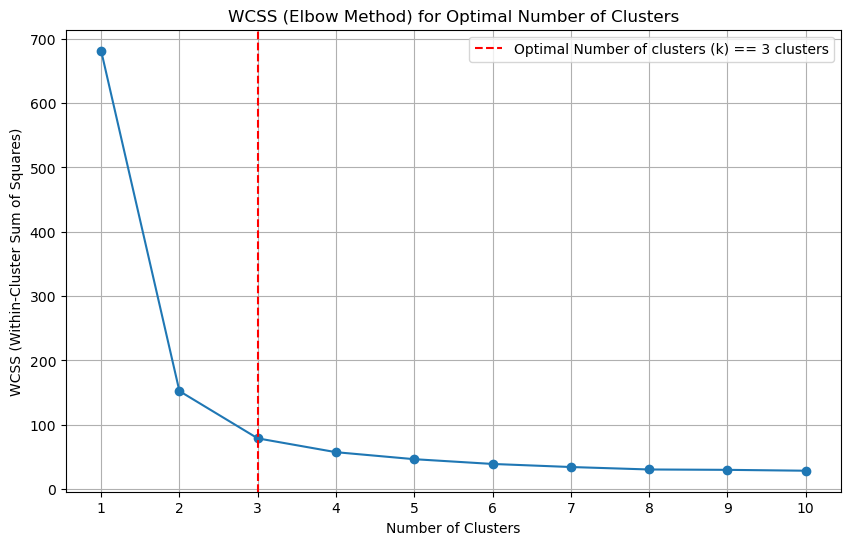

Optimal number of clusters: 3


In [12]:
# Load the Iris dataset
iris = load_iris()
X = iris.data

## convert data to dataframe: 
### 2-dimensional datastructure used for storing tabular data (rows and columns). Each column is a specific attribute (or feature), each row is an entire instance (aka object, sample, data point, observation)
df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)

lst_attributes = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']


max_num_clusters = 10
K = range(1, max_num_clusters+1)  # You can adjust the range based on your needs

# Calculate the WCSS for a range of cluster numbers
wcss = []


for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # inertia_ is the WCSS

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the WCSS to visualize the elbow
plt.plot(K, wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('WCSS (Elbow Method) for Optimal Number of Clusters')
plt.grid(True)

# Find the elbow point using the KneeLocator
kneedle = KneeLocator(K, wcss, curve='convex', direction='decreasing')
optimal_clusters = kneedle.elbow

# Plot the elbow point on the graph
plt.axvline(x=optimal_clusters, color='r', linestyle='--', label=f'Optimal Number of clusters (k) == {optimal_clusters} clusters')
plt.legend()
plt.grid(True)
# Set x-ticks to show each whole number in the range of cluster numbers
plt.xticks(K)
plt.show()

print(f'Optimal number of clusters: {optimal_clusters}')

# Perform WCSS on standardized data

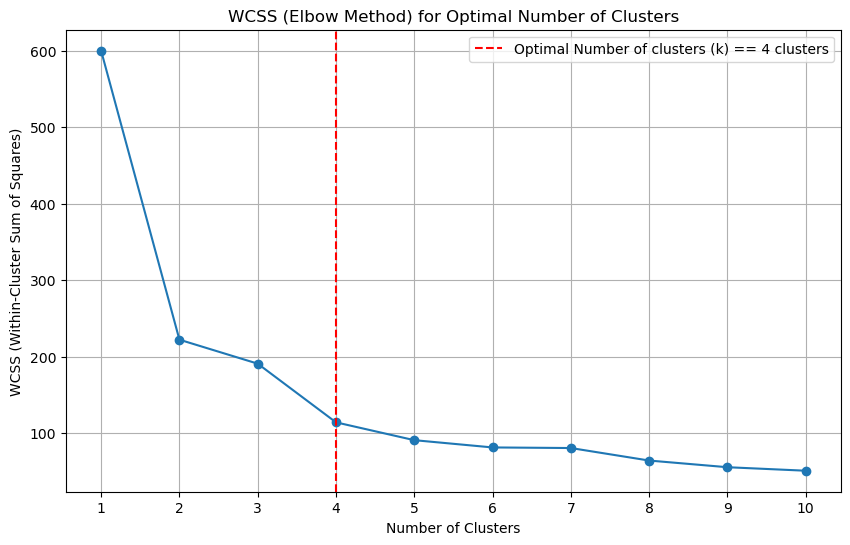

Optimal number of clusters: 4


In [13]:
# Load the Iris dataset
iris = load_iris()
X = iris.data

max_num_clusters = 10
K = range(1, max_num_clusters+1)  # You can adjust the range based on your needs

# Calculate the WCSS for a range of cluster numbers
wcss = []

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # inertia_ is the WCSS

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the WCSS to visualize the elbow
plt.plot(K, wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('WCSS (Elbow Method) for Optimal Number of Clusters')
plt.grid(True)

# Find the elbow point using the KneeLocator
kneedle = KneeLocator(K, wcss, curve='convex', direction='decreasing')
optimal_clusters = kneedle.elbow

# Plot the elbow point on the graph
plt.axvline(x=optimal_clusters, color='r', linestyle='--', label=f'Optimal Number of clusters (k) == {optimal_clusters} clusters')
plt.legend()
plt.grid(True)
# Set x-ticks to show each whole number in the range of cluster numbers
plt.xticks(K)
plt.show()

print(f'Optimal number of clusters: {optimal_clusters}')

# Calculate optimal cluster number based on highest score via Silhouette Score

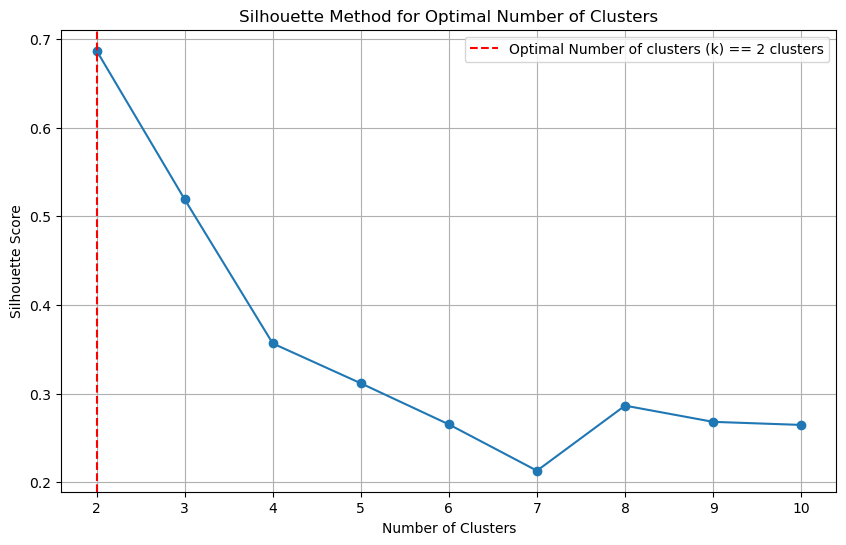

Optimal number of clusters: 2


In [14]:
# Define the range of clusters to test
K = range(2, 11)  # Silhouette score is not defined for 1 cluster

# List to hold the silhouette scores
silhouette_scores = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X, clusters)
    silhouette_scores.append(score)

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the silhouette scores
plt.plot(K, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal Number of Clusters')
plt.grid(True)

# Find the optimal number of clusters
optimal_clusters = K[np.argmax(silhouette_scores)]

# Plot the optimal number of clusters on the graph
plt.axvline(x=optimal_clusters, color='r', linestyle='--', label=f'Optimal Number of clusters (k) == {optimal_clusters} clusters')
plt.legend()
plt.show()

print(f'Optimal number of clusters: {optimal_clusters}')

# Assign each instance to cluster

In [15]:
# select optimal cluster count
optimal_clusters = 3

# Fit K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
arr_clusters = kmeans.fit_predict(X_scaled)

# add prediction to df
df_iris['k_means_cluster'] = arr_clusters

adjusted_rand_SCORE = adjusted_rand_score(iris.target, arr_clusters)
normalized_mutual_info_SCORE = normalized_mutual_info_score(iris.target, clusters)

print(f'Adjusted Rand Index (ARI): {adjusted_rand_SCORE:.2f}')
print(f'Normalized Mutual Information (NMI): {normalized_mutual_info_SCORE:.2f}')

Adjusted Rand Index (ARI): 0.43
Normalized Mutual Information (NMI): 0.58


    Both ARI and NMI are used to evaluate the quality of clustering results by comparing the predicted cluster assignments with ground-truth labels.

    1️⃣ Adjusted Rand Index (ARI)
        * Measures similarity between the predicted clusters and the true labels.
        * Adjusts for chance by considering the expected number of agreements between clusters.
        * Range:
            - 1 → Perfect clustering match
            - 0 → Random clustering
            - Negative values → Worse than random clustering
        * Used when true labels are available for evaluation.
        
    2️⃣ Normalized Mutual Information (NMI)
        *Measures shared information between predicted clusters and true labels.
        *Based on entropy (information theory)—quantifies how much information one variable provides about another.
        *Range:
            - 1 → Perfect clustering match
            - 0 → No mutual information
            - Invariant to cluster label permutations, meaning it works well even when cluster labels differ from ground truth.

    When to Use ARI vs. NMI?
        * Use ARI when cluster label assignments matter (e.g., when evaluating clustering stability).
        * Use NMI when label permutation does not matter (e.g., when comparing clusters with different label orderings).
        
    🚀 Conclusion: ARI is more sensitive to exact cluster assignments, while NMI is better for comparing overall clustering structure. - Source: ChatGPT



# View dataframe with cluster assignment

In [16]:
df_iris

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     k_means_cluster  
0                  1  
1                  2  
2                  2  
3                  2  
4                  1  
..               ...  
145                0  
146                0  
147                0  
148                0  
149                0  

[150 rows x 5 columns]

<hr style="height:75px;color:#000;background-color:#000;">


# Principal Component Analysis (PCA)
<h2>When you perform Principal Component Analysis (PCA) on the Iris dataset, all four original features—sepal_length, sepal_width, petal_length, and petal_width—are included in the analysis. The PCA process transforms these four features into a new set of orthogonal (uncorrelated) components, called principal components. These principal components are linear combinations of the original features and represent the directions of maximum variance in the data.</h2>

<h2>We want to reduce the dimensionality of the data down to the accumulation of fewest principal components that capture most of the variance of the data. <br>
We will label each axis with the corresponding principal component (PC_1, PC_2, PC_3) label and the percentage of total variance each PC explains.<br>
In more complex datasets, we may end up with many more PC's, however, we stop accumulating a PC when the variance explained by the additional PC does not enhance overall variance significantly.</h2>

In [17]:
# Step 1: Load the Iris dataset
iris = datasets.load_iris()
X = iris.data  # Features
y = iris.target  # Target labels
n = len(X[0]) # specify number of Principal Components - to start with, let n == number of features

# Step 2: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply PCA to reduce to n components (e.g., 3 components)
pca = PCA(n_components=n)
X_pca = pca.fit_transform(X_scaled)

# extract ratio explaining how much variance each PC provides
explained_variance = pca.explained_variance_ratio_

#notify
print(f'explained_variance ratio: {list(explained_variance)}\n')

explained_variance ratio: [0.7296244541329988, 0.22850761786701757, 0.03668921889282881, 0.00517870910715476]



# Determine optimal number of Principal Components via: 
* Cumulative Explained Variance
* Scree Plot (find the elbow)
* Cross-Validation using a model

## Plot Cumulative Explained variance

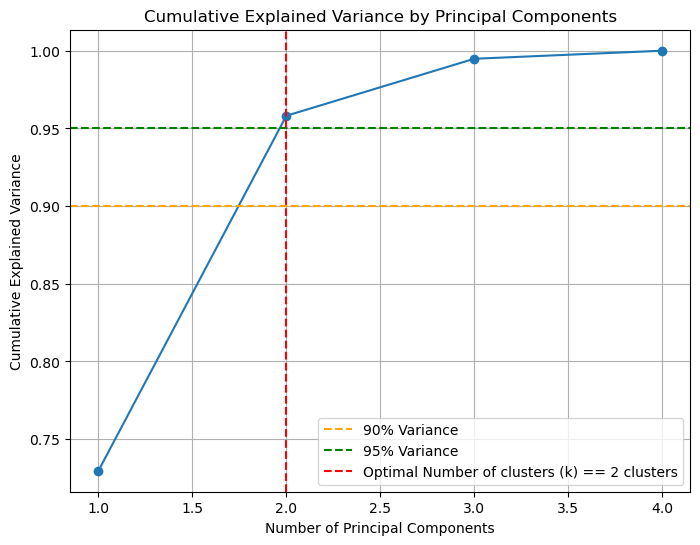

cumulative explained variance:
	1 PC == 72.96% variance
	2 PC == 95.81% variance
	3 PC == 99.48% variance
	4 PC == 100.00% variance





In [18]:
# we can do this by plotting the number of PC's and then the amount of variance explained by adding each component until we reach acceptable threshold

# Each eigenvalue represents that amount of explained variance

# Plot cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance)

# Step 3: Identify the "elbow" point using KneeLocator on cumulative explained variance
knee_locator = KneeLocator(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, curve='concave', direction='increasing')
optimal_components = knee_locator.elbow


# plot variance explained adding each PC
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')

# draw 90% and 95% explained variance line
plt.axhline(y=0.90, color='orange', linestyle='--', label='90% Variance')
plt.axhline(y=0.95, color='g', linestyle='--', label='95% Variance')

# plot optimal components
plt.axvline(x=optimal_components, color='r', linestyle='--', label=f'Optimal Number of clusters (k) == {optimal_components} clusters')

# set titles
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Principal Components')

# uncomment out to simplify x-axis ticks
#plt.xticks(range(1, len(cumulative_explained_variance) + 1))

plt.grid(True)
plt.legend()
plt.show()

# print cumulative explained variance:
print('cumulative explained variance:\n================================')
for i in range(len(cumulative_explained_variance)):
    print(f'\t{i+1} PC == {cumulative_explained_variance[i]:.2%} variance')
print('\n\n')

<h2> Give the above results, we can achieve 95% explained variance in the dataset using 2 Principal Components.
<br>We also see we could achieve 99% explained variance if we use 3 PCs.
Let's choose 3 components in this instance.</h2>

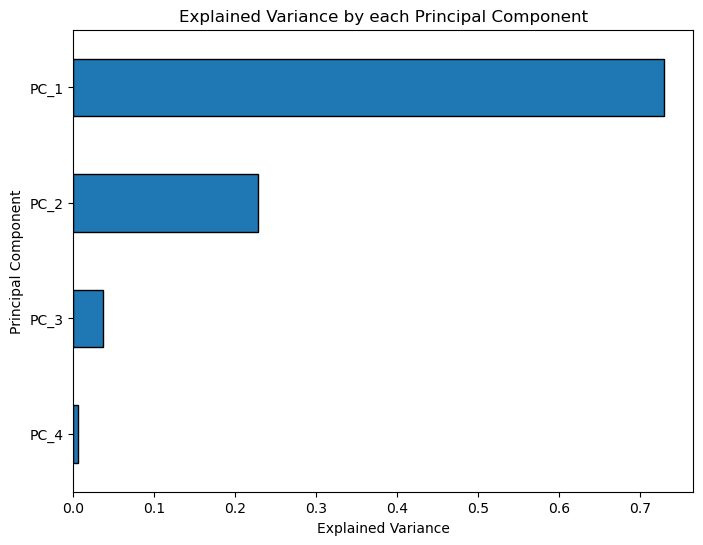

explained variance by each PC:
	PC_1 == 72.96% variance
	PC_2 == 22.85% variance
	PC_3 == 3.67% variance
	PC_4 == 0.52% variance





In [19]:
plt.figure(figsize=(8, 6))

#, columns=[f'PC_{i+1}' for i in range(n)]
df_explained_variance = pd.DataFrame(explained_variance, columns=['explained_variance'], index=[f'PC_{i+1}' for i in range(n)])

# sort
df_explained_variance.sort_values(by='explained_variance', ascending=True, inplace=True)

# plot explained variance
df_explained_variance['explained_variance'].plot(kind='barh', edgecolor='black')

plt.xlabel('Explained Variance')
plt.ylabel('Principal Component')
plt.title('Explained Variance by each Principal Component')
plt.show()

print('explained variance by each PC:\n================================')
for i in range(len(explained_variance)):
    print(f'\tPC_{i+1} == {explained_variance[i]:.2%} variance')
print('\n\n')

# Chart Scree Plot

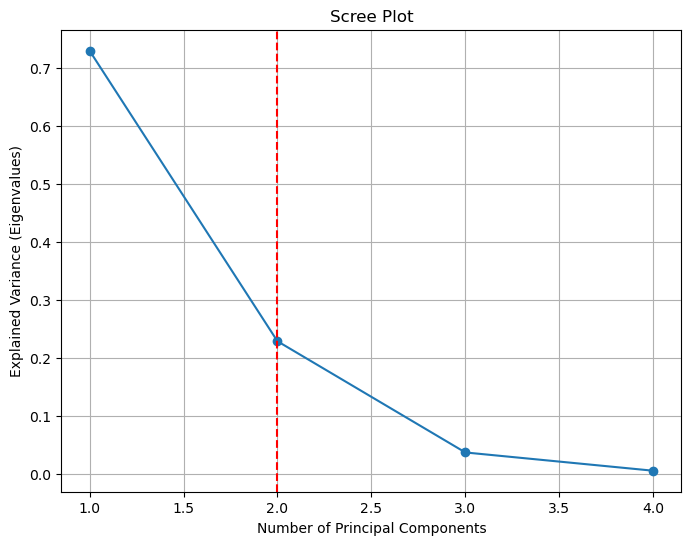

In [20]:
# Scree plot using explained variance
# A scree plot shows the percentage of variance explained by each principal component. The goal is to choose the number of components that explain a sufficient amount of variance.
# Plot the cumulative explained variance against the number of components.
# Look for the "elbow" point where the explained variance starts to level off. The number of components at this point is often considered optimal.

# calculate optimal components
knee_locator = KneeLocator(range(1, len(explained_variance) + 1), explained_variance, curve='convex', direction='decreasing')
optimal_pcs = knee_locator.elbow # note: the greatest change in slope is at 2, then 3, and very minor after that. we can choose 2 or 3

# plot chart
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_)+1), explained_variance, marker='o', linestyle='-')
plt.axvline(x=optimal_pcs, color='r', linestyle='--', label=f'Optimal Number of clusters (k) == {optimal_components} clusters')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance (Eigenvalues)')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

## Plot Cross-Validation Accuracy at each PC

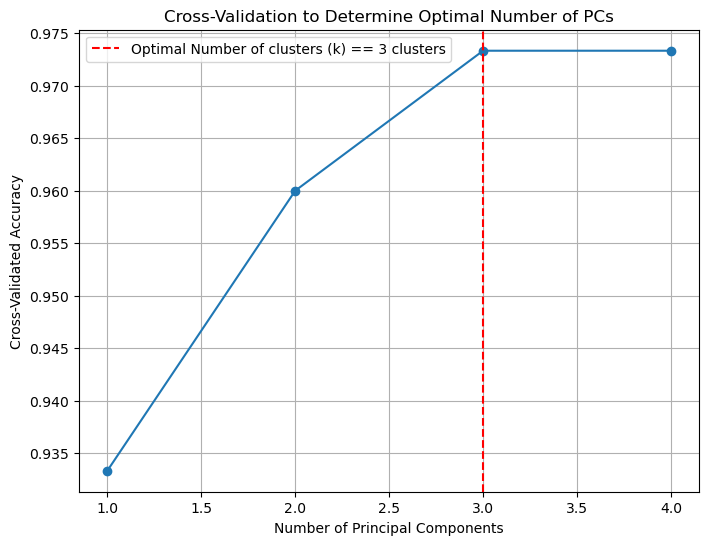


Optimal number of components: 3
optimal number of principal components (n) has been updated to 3 which will provide cumulative_explained_variance of 99.48% variance




In [21]:
# Cross-Validation using a model and measure the number of components that produce the best accuracy
# we can also determine the point in which accuracy improvement plateaus as we add new PCs
# the plateau significies the point where there is no longer an appreciable increase in accuracy
# as we add to model complexity
#X, y = load_iris(return_X_y=True)

# Test different numbers of principal components
pca_components = list(range(1, X.shape[1] + 1))
scores = []

for n in pca_components:
    pca_cv = PCA(n_components=n)
    model = LogisticRegression()
    pipeline = Pipeline([('pca', pca_cv), ('logistic', model)])
    score = cross_val_score(pipeline, X, y, cv=5).mean()
    scores.append(score)

# Optimal number of components
optimal_components = pca_components[np.argmax(scores)]

# update n
n = optimal_components
n_optimal_pca = optimal_components

plt.figure(figsize=(8, 6))
plt.plot(pca_components, scores, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Cross-Validation to Determine Optimal Number of PCs')
plt.axvline(x=optimal_components, color='r', linestyle='--', label=f'Optimal Number of clusters (k) == {optimal_components} clusters')
plt.grid(True)
plt.legend()
plt.show()



# notify
print(f'\nOptimal number of components: {optimal_components}')
print(f'optimal number of principal components (n) has been updated to {n} which will provide cumulative_explained_variance of {cumulative_explained_variance[n-1]:.2%} variance\n\n')




<hr style="height:75px;color:#000;background-color:#000;">

# Plot data down to a 3-dimensional space using PCA, and visualize how instances (data points) are transformed and distributed in this new reduced space, based on their projections onto the principal components.
# Note, this is visualizing how the datapoints are projected into this new 3D space <b>(it is not a clustering model yet)</b>

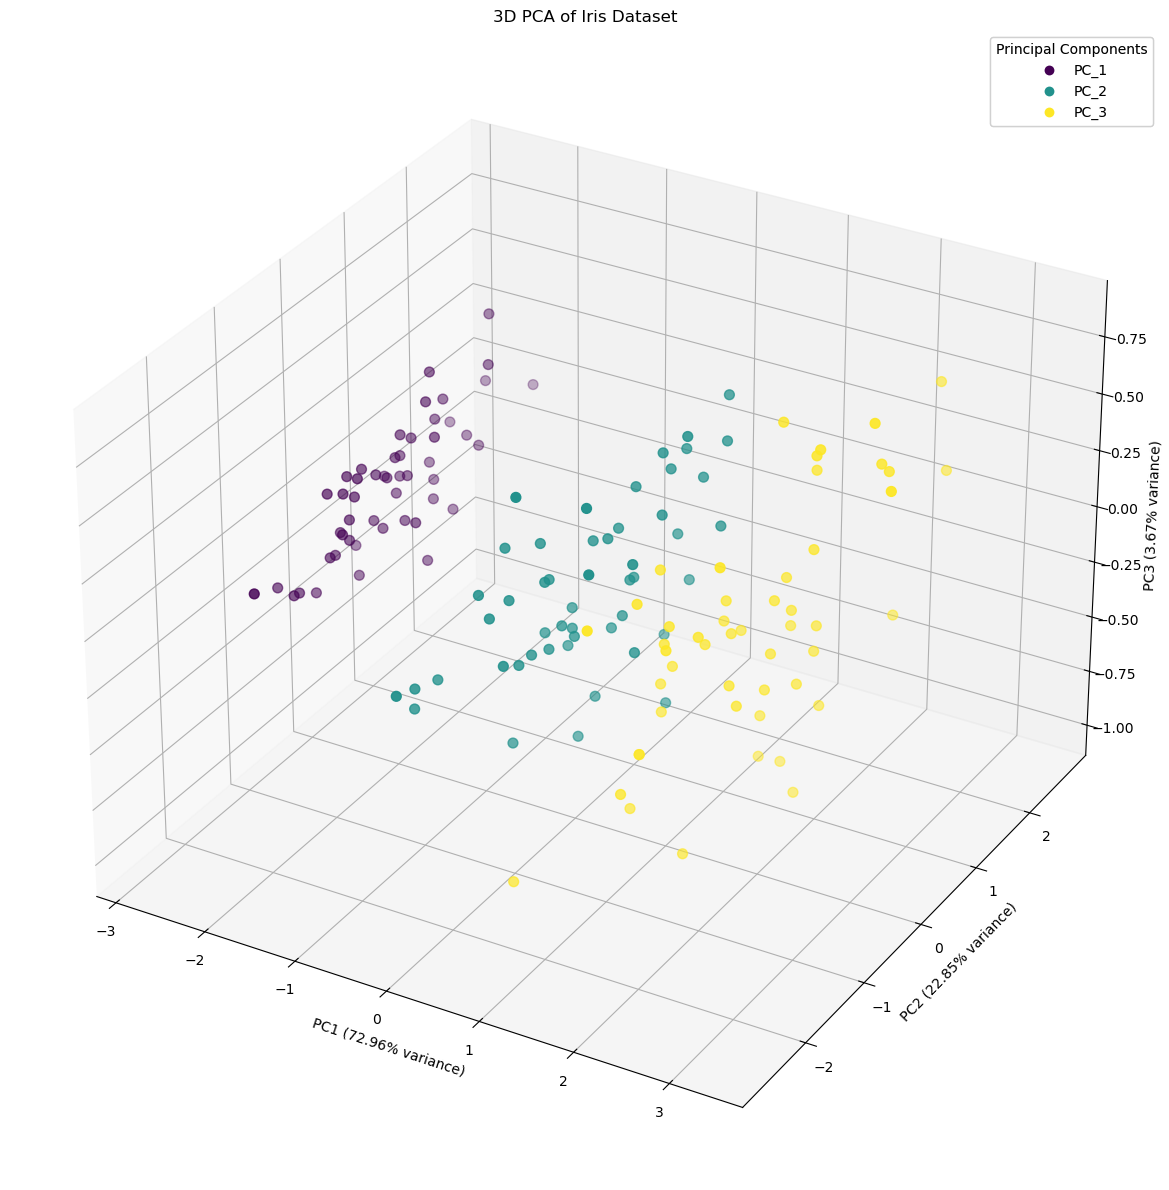

In [22]:
# Step 1: Load the Iris dataset
iris = datasets.load_iris()
X = iris.data  # Features
y = iris.target  # Target labels
n = 3 # specify number of Principal Components to plot on a 3d chart

# Step 2: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply PCA to reduce to n components (e.g., 3 components)
pca = PCA(n_components=n)
X_pca = pca.fit_transform(X_scaled)

# extract ratio explaining how much variance each PC provides
explained_variance = pca.explained_variance_ratio_


# Step 4: Create a DataFrame for easier manipulation and visualization
#df_pca = pd.DataFrame(X_pca, columns=['PC_1', 'PC_2', 'PC_3'])
df_pca = pd.DataFrame(X_pca, columns=[f'PC_{i+1}' for i in range(n)]) # use this loop vice hard coding columns=['PC_1', 'PC_2', 'PC_3']
df_pca['Target'] = y

# Step 5: Visualize the results in 3D
fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(111, projection='3d')

# create scatter plot for each dimension
lst_del = df_pca['PC_1'], df_pca['PC_2'], df_pca['PC_3']
scatter = ax.scatter(df_pca['PC_1'], df_pca['PC_2'], df_pca['PC_3'], c=df_pca['Target'], cmap='viridis', s=50)

# Add axis labels with explained variance: the proportion of variance explained by each of the principal components.
# when there are more axes, we can decide the point we have enough axes represented when we can explain enough
# of the variance in the dataset between the principal components selected
ax.set_xlabel(f'PC1 ({explained_variance[0]:.2%} variance)')
ax.set_ylabel(f'PC2 ({explained_variance[1]:.2%} variance)')
ax.set_zlabel(f'PC3 ({explained_variance[2]:.2%} variance)')
ax.set_title('3D PCA of Iris Dataset')


# Add legend
#The *scatter.legend_elements() syntax in Python is used to unpack the elements returned by the legend_elements() method of a matplotlib scatter plot object (scatter in this case)
#legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
#ax.add_artist(legend1)

# manually update legend
handles, _ = scatter.legend_elements()
legend1 = ax.legend(handles, ['PC_1', 'PC_2', 'PC_3'], title="Principal Components", loc="upper right")
ax.add_artist(legend1)


# Show plot
plt.tight_layout()
plt.show()


# View PCA Ratio of Explained Variance per PC

In [23]:
print(f'PCA explained_variance: {explained_variance}') 

PCA explained_variance: [0.72962445 0.22850762 0.03668922]


# Plot increase in total variance by inclusion of each PC

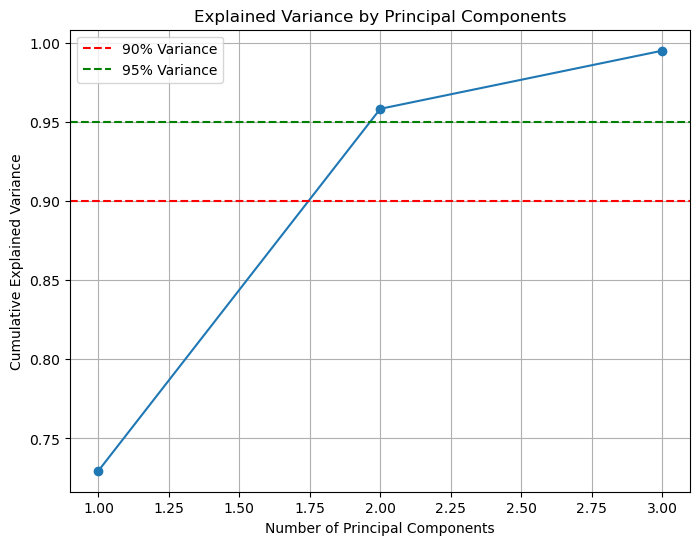


 number of chosen Principal Components: [3]. Explained variance by chosen PCs: 99.48%


In [24]:
# Plot cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance)

plt.figure(figsize=(8, 6))

# plot variance explained adding each PC
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')

# draw 90% and 95% explained variance line
plt.axhline(y=0.90, color='r', linestyle='--', label='90% Variance')
plt.axhline(y=0.95, color='g', linestyle='--', label='95% Variance')

# set titles
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')

# uncomment out to simplify x-axis ticks
#plt.xticks(range(1, len(cumulative_explained_variance) + 1))

plt.grid(True)
plt.legend()
plt.show()

# notify
print(f'\n number of chosen Principal Components: [{n}]. Explained variance by chosen PCs: {cumulative_explained_variance[n-1]:.2%}')

<hr style="height:75px;color:#000;background-color:#000;">


# Apply PCA to Modeling

Accuracy of Logistic Regression with PCA on the test set: 0.93
Precision for each class: 0.93
Recall for each class: 0.93
F1-Score for each class: 0.93

Classification Report for Logistic Regression with PCA:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30
 


Confusion Matrix:

[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]


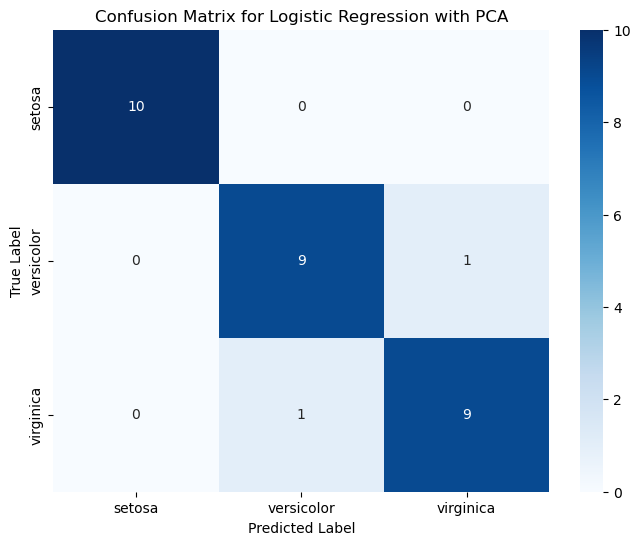

In [25]:
#n_optimal_pca
# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit PCA on the training data and transform both training and test data
# NOTE: viewing these arrays - shows how much each instance contributes to principal component
pca = PCA(n_components=n_optimal_pca)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train a logistic regression model on the PCA-transformed training data
mdl_trained_top_model = LogisticRegression()
mdl_trained_top_model.fit(X_train_pca, y_train)

# Make predictions on the PCA-transformed test data
y_pred_pca = mdl_trained_top_model.predict(X_test_pca)

# Calculate the accuracy score
accuracy_pca = accuracy_score(y_test, y_pred_pca)
precision = precision_score(y_test, y_pred_pca, average='weighted')
recall = recall_score(y_test, y_pred_pca, average='weighted')
f1 = f1_score(y_test, y_pred_pca, average='weighted')

# uncomment out below to show the results separately i.e., per class
#precision = precision_score(y_test, y_pred_pca, average=None)
#recall = recall_score(y_test, y_pred_pca, average=None)
#f1 = f1_score(y_test, y_pred_pca, average=None)



# Print the accuracy
print(f"Accuracy of Logistic Regression with PCA on the test set: {accuracy_pca:.2f}")
print(f"Precision for each class: {precision:.2f}")
print(f"Recall for each class: {recall:.2f}")
print(f"F1-Score for each class: {f1:.2f}\n")

# Generate classification report
class_report = classification_report(y_test, y_pred_pca, target_names=iris.target_names)

# Print the classification report
print("Classification Report for Logistic Regression with PCA:\n")
print(class_report,'\n\n')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_pca)

# Print confusion matrix
print("Confusion Matrix:\n")
print(conf_matrix)

# Plot confusion matrix with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Confusion Matrix for Logistic Regression with PCA")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()



For multiclass classification like Iris, use average='micro', average='macro', or average='weighted' in precision_score, recall_score, and f1_score.
* Micro average aggregates all classes and computes the metrics globally.
* Macro average computes the metrics for each class individually and then averages them.
* Weighted avg computes the metrics for each class individually and then averages them, weighted by the number of true instances per class.

Choosing the best averaging method depends on the context of your classification task and the distribution of your classes. Here's a brief breakdown of the three options:

* Micro average:
    * Best when: You care about overall classification performance and want to treat all instances equally, regardless of the class distribution.
    * How it works: It aggregates the contributions of all classes to compute the metrics, treating them as a single binary classification problem.
    * Use when: Classes are imbalanced or when you're more concerned with the overall performance across all classes.
* Macro average:
    * Best when: You care about performance across all classes equally, regardless of the class distribution.
    * How it works: It calculates the metric for each class individually and then averages them, giving equal weight to each class.
    * Use when: You want to ensure that the model performs well across all classes, especially when they have different frequencies (i.e., in imbalanced datasets).
* Weighted average:
    * Best when: You care about overall performance but also want to account for class imbalances.
    * How it works: Similar to macro average, but each class's contribution to the average is weighted by the number of true instances in that class. This way, more frequent classes have a larger influence on the metric.
    * Use when: You have imbalanced classes and want the evaluation metrics to reflect this imbalance.
*Which to choose?
    * If the dataset has balanced classes, macro average and micro average will give similar results. Either can be used, but micro is typically preferred for overall accuracy.
    * If the dataset has imbalanced classes, the weighted average is often more meaningful because it accounts for class distribution, giving more weight to the more frequent classes.
* For the Iris dataset, where the classes are fairly balanced, macro average and micro average would likely give similar results. If you want to account for possible class distribution changes, weighted average could provide additional insights.
* Summary Recommendations:
    * Use micro average for overall performance.
    * Use macro average if you want to treat all classes equally.
    * Use weighted average if you need to account for imbalances.

source: ChatGPT 


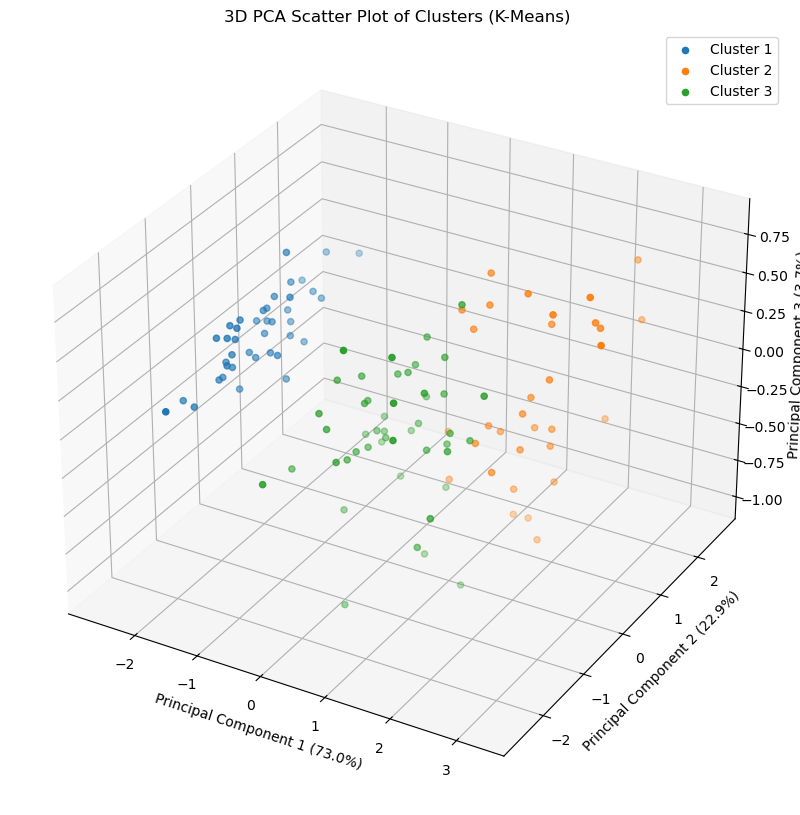

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


# --- K-Means Clustering ---
n_clusters = 3  # Choose the number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_train_pca)

# --- 3D Visualization ---
fig = plt.figure(figsize=(10, 12))
ax = fig.add_subplot(111, projection='3d') #creates the 3d axes

# Plot each cluster separately
for i in range(n_clusters):
    cluster_data = X_train_pca[cluster_labels == i]
    ax.scatter(cluster_data[:, 0], cluster_data[:, 1], cluster_data[:, 2], label=f'Cluster {i+1}')

ax.set_xlabel(f'Principal Component 1 ({explained_variance[0]*100:.1f}%)')
ax.set_ylabel(f'Principal Component 2 ({explained_variance[1]*100:.1f}%)')
ax.set_zlabel(f'Principal Component 3 ({explained_variance[2]*100:.1f}%)')
ax.set_title('3D PCA Scatter Plot of Clusters (K-Means)')
ax.legend()
plt.show()


# generate 3D interactive graph

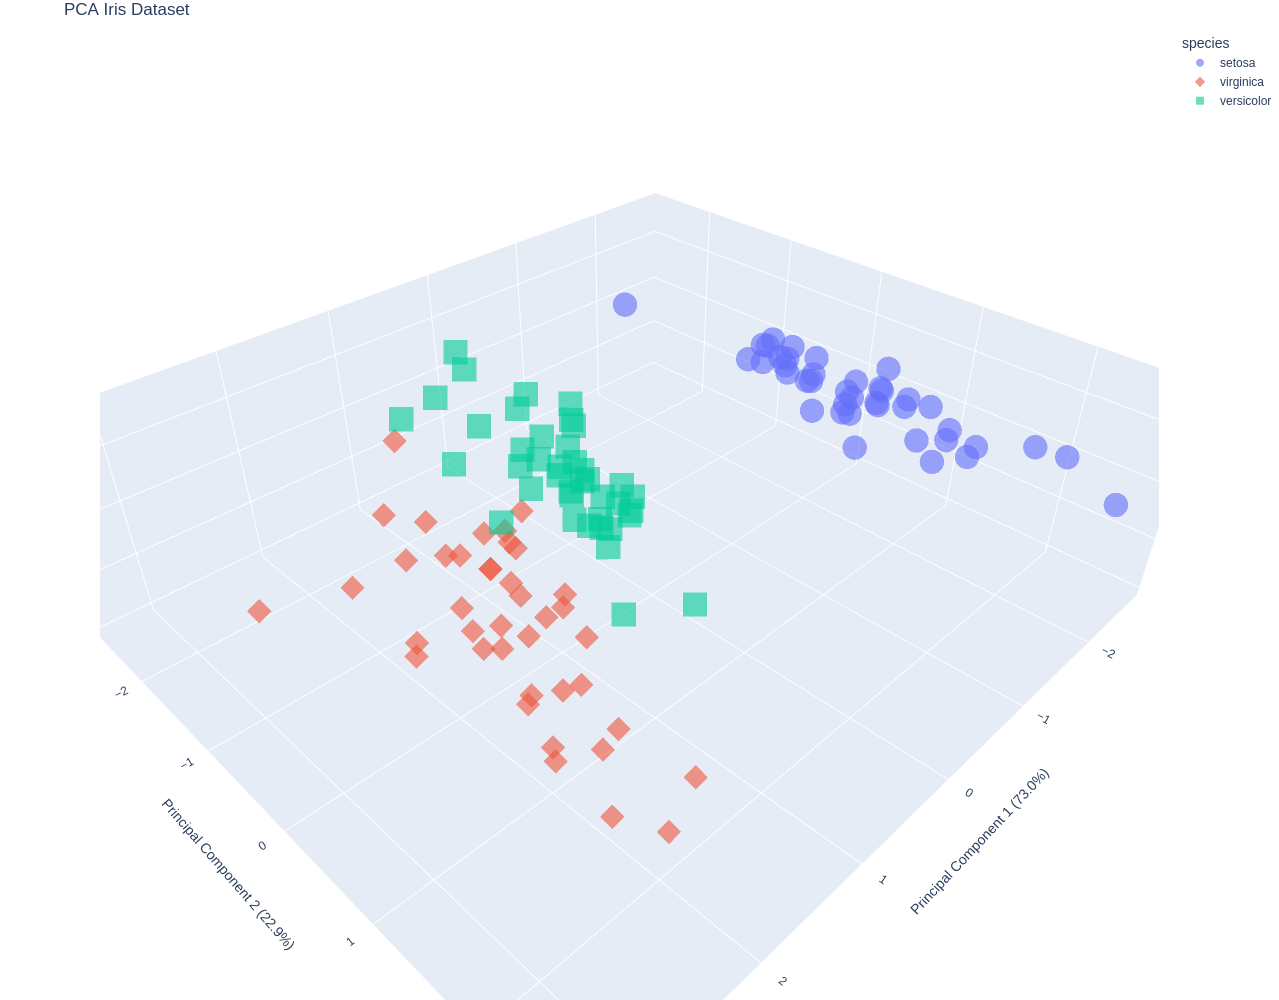

In [27]:
import pandas as pd
import plotly.express as px
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


# --- K-Means Clustering ---
n_clusters = 3  # Choose the number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_train_pca)

# --- Create DataFrame for Plotly ---
df_plot = pd.DataFrame(X_train_pca, columns=[f"PC{i+1}" for i in range(X_train_pca.shape[1])])
df_plot['cluster'] = cluster_labels
df_plot['species'] = [iris.target_names[i] for i in y_train] # added species names for comparison

# --- 3D Visualization with Plotly Express ---
fig = px.scatter_3d(df_plot, 
                     x='PC1', 
                     y='PC2', 
                     z='PC3', 
                     color='species',  # Color by cluster
                     symbol="species", #symbol by species
                     opacity=0.6,
                     title='3D PCA Scatter Plot of Clusters (K-Means)',
                     labels={  # Customize axis labels
                         "PC1": f"Principal Component 1 ({explained_variance[0]*100:.1f}%)",
                         "PC2": f"Principal Component 2 ({explained_variance[1]*100:.1f}%)",
                         "PC3": f"Principal Component 3 ({explained_variance[2]*100:.1f}%)"
                     })

# Optional: Tight layout
fig.update_layout(title="PCA Iris Dataset",
                  margin=dict(l=100, r=0, b=0, t=30), 
                  width=1400,  # Adjust width
                  height=1000   # Adjust height
                 )

########################################################################
# save the plot
########################################################################
fig.write_html('./pca_iris_dataset.html')

fig.show()




# Deploy trained model via PCA against existing instance

In [28]:
# Define new instance
i = 1
instance = X_test[[i]]

# Step 1: Standardize the new instance using the fitted scaler
instance_scaled = scaler.transform(instance)

# Step 2: Transform the standardized instance using the fitted PCA model
instance_pca = pca.transform(instance_scaled)

# Step 3: Predict the class using the trained logistic regression model
prediction = mdl_trained_top_model.predict(instance_pca)

# get predicted class
predicted_target = prediction[0]
predicted_target

predicted_class = iris.target_names[predicted_target]
predicted_class

# get ground truth
ground_truth = y_test[i]
ground_truth

ground_truth_class = iris.target_names[ground_truth]
ground_truth_class

# determine if our model was correct for this instance
print('instance index:', i, ' predicted_class:', predicted_class, ' ground truth:', ground_truth_class, ' prediction correct:', (predicted_class == ground_truth_class))

instance index: 1  predicted_class: virginica  ground truth: virginica  prediction correct: True


# Deploy the model to Check new instance against trained model using PCA

In [29]:
# Define new instance
new_instance = np.array([[7.7, 3.1, 5.1, 1.8]])

# Step 1: Standardize the new instance using the fitted scaler
new_instance_scaled = scaler.transform(new_instance)

# Step 2: Transform the standardized instance using the fitted PCA model
new_instance_pca = pca.transform(new_instance_scaled)

# Step 3: Predict the class using the trained logistic regression model
prediction = mdl_trained_top_model.predict(new_instance_pca)

# Print the predicted class
predicted_class = prediction[0]
class_labels = iris.target_names  # ['setosa', 'versicolor', 'virginica']
print(f"Predicted class for the new instance: {class_labels[predicted_class]}")

Predicted class for the new instance: virginica
